In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
# Create separate Car Make and model columns
df['make'] = df.apply(lambda x: x['CarName'].split(' ')[0], axis=1)
df['model'] = df.apply(lambda x: ' '.join(x['CarName'].split(' ')[1:]), axis=1)
df = df.drop(['CarName'], axis=1)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make,model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [7]:
order = [df.columns[0]] + list(df.columns[-2:]) + list(df.columns[1:-2])
df = df.reindex(columns=order)
df.head()

,car_ID,make,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,giulia,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,stelvio,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,100 ls,2,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,100ls,2,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
def correct(s):
    if s == 'alfa-romero': return 'alfa-romeo'
    if s == 'maxda': return 'mazda'
    if s == 'Nissan': return 'nissan'
    if s == 'porcshce': return 'porsche'
    if s == 'toyouta': return 'toyota'
    if s == 'vokswagen' or s == 'vw': return 'volkswagen'
    return s
df['make'] = df.apply(lambda x: correct(x['make']), axis=1)
df.head()

,car_ID,make,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romeo,giulia,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romeo,stelvio,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romeo,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,100 ls,2,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,100ls,2,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
le = {
    'make': LabelEncoder(),
    'symboling': LabelEncoder(),
    'fueltype': LabelEncoder(),
    'aspiration': LabelEncoder(),
    'doornumber': LabelEncoder(),
    'carbody': LabelEncoder(),
    'drivewheel': LabelEncoder(),
    'enginelocation': LabelEncoder(),
    'enginetype': LabelEncoder(),
    'cylindernumber': LabelEncoder(),
    'fuelsystem': LabelEncoder()
}
df.head()

,car_ID,make,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romeo,giulia,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romeo,stelvio,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romeo,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,100 ls,2,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,100ls,2,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
encode_cols = ['make', 'fueltype', 'aspiration', 'carbody','drivewheel', 'enginelocation', 'doornumber', 'fuelsystem', 'enginetype', 'cylindernumber']
for col in encode_cols:
    df[col] = le[col].fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   make              205 non-null    int32  
 2   model             205 non-null    object 
 3   symboling         205 non-null    int64  
 4   fueltype          205 non-null    int32  
 5   aspiration        205 non-null    int32  
 6   doornumber        205 non-null    int32  
 7   carbody           205 non-null    int32  
 8   drivewheel        205 non-null    int32  
 9   enginelocation    205 non-null    int32  
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    int32  
 16  cylindernumber    205 non-null    int32  
 1

In [11]:
df.head()

,car_ID,make,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,giulia,3,1,0,1,0,2,0,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,0,stelvio,3,1,0,1,0,2,0,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,0,Quadrifoglio,1,1,0,1,2,2,0,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,100 ls,2,1,0,0,3,1,0,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,100ls,2,1,0,0,3,0,0,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
rm_cols = list(df.columns)
rm_cols.remove('car_ID')
rm_cols.remove('model')
rm_cols.remove('price')
original = df.copy()
for column in rm_cols:
    df[column] = df[column]  / df[column].abs().max()
df.head()

,car_ID,make,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0.000000,giulia,1.000000,1.0,0.0,1.0,0.00,1.0,0.0,...,0.398773,0.714286,0.880711,0.642686,0.391304,0.385417,0.757576,0.428571,0.500000,13495.0
1,2,0.000000,stelvio,1.000000,1.0,0.0,1.0,0.00,1.0,0.0,...,0.398773,0.714286,0.880711,0.642686,0.391304,0.385417,0.757576,0.428571,0.500000,16500.0
2,3,0.000000,Quadrifoglio,0.333333,1.0,0.0,1.0,0.50,1.0,0.0,...,0.466258,0.714286,0.680203,0.832134,0.391304,0.534722,0.757576,0.387755,0.481481,16500.0
3,4,0.047619,100 ls,0.666667,1.0,0.0,0.0,0.75,0.5,0.0,...,0.334356,0.714286,0.809645,0.815348,0.434783,0.354167,0.833333,0.489796,0.555556,13950.0
4,5,0.047619,100ls,0.666667,1.0,0.0,0.0,0.75,0.0,0.0,...,0.417178,0.714286,0.809645,0.815348,0.347826,0.399306,0.833333,0.367347,0.407407,17450.0


In [13]:
X = df.copy()
X = X.drop(['car_ID', 'model', 'price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'R2 score: {model.score(X_test, y_test)}')
df['predictedprice'] = model.predict(X)

R2 score: 0.8345623216967671


In [15]:
from matplotlib import pyplot as plt
import random

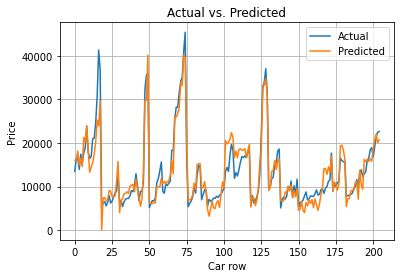

In [22]:
plt.title('Actual vs. Predicted')
plt.xlabel('Car row')
plt.ylabel('Price')

plt.plot(range(df.shape[0]), df['price'])
plt.plot(range(df.shape[0]), model.predict(X))
    
plt.legend(['Actual', 'Predicted'])
plt.grid()
plt.show()

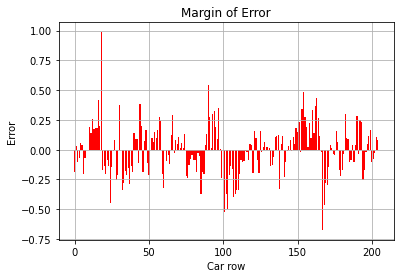

In [30]:
# Display margin of error
def moe(x, y):
    result = (x - y) / x
    return result
plt.bar(range(df.shape[0]), moe(df['price'], df['predictedprice']), color = 'red')

plt.title('Margin of Error')

plt.xlabel('Car row')
plt.ylabel('Error')

plt.grid()
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   make              205 non-null    float64
 2   model             205 non-null    object 
 3   symboling         205 non-null    float64
 4   fueltype          205 non-null    float64
 5   aspiration        205 non-null    float64
 6   doornumber        205 non-null    float64
 7   carbody           205 non-null    float64
 8   drivewheel        205 non-null    float64
 9   enginelocation    205 non-null    float64
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    float64
 15  enginetype        205 non-null    float64
 16  cylindernumber    205 non-null    float64
 1

In [19]:
sample_vehicle = {'make': 'toyota', 
                  'symboling': 2, 
                  'fueltype': 'gas', 
                  'aspiration': 'turbo', 
                  'doornumber': 'four', 
                  'carbody': 'sedan', 
                  'drivewheel': 'rwd',
                  'enginelocation': 'front', 
                  'wheelbase': 93.7, 
                  'carlength': 158.9, 
                  'carwidth': 65., 
                  'carheight': 55., 
                  'curbweight': 1920, 
                  'enginetype': 'ohc', 
                  'cylindernumber': 'four',
                  'enginesize': 132, 
                  'fuelsystem': '1bbl', 
                  'boreratio':3.,
                  'stroke': 3.1, 
                  'compressionratio': 8.7, 
                  'horsepower': 136, 
                  'peakrpm': 7100, 
                  'citympg': 21, 
                  'highwaympg': 25}

def normalize(x: float = None):
    if not x:
        return ''
    return x / df[x].abs().max()

def encode(vehicle: dict = {}):
    if not dict:
        return {}
    for key in vehicle.keys():
        if key not in list(df.columns):
            return {}
    for key in list(encode_cols):
        vehicle[key] = le[key].transform([vehicle[key]])[0]
        
    for column in df.columns:
        if column not in vehicle.keys():
            continue
        vehicle[column] = vehicle[column]  / original[column].abs().max()
    return vehicle

encoded = encode(sample_vehicle)
row = pd.DataFrame.from_dict(dict((k, [v]) for k, v in encoded.items()))

In [20]:
model.predict(row)

array([16296.138004])